In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, QuantileTransformer, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.compose import ColumnTransformer
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [58]:
df_path = "c:/Users/Userpc/Desktop/Projects/ML Shortcuts/Data/data3.csv"
df = pd.read_csv(df_path)

<Axes: xlabel='x', ylabel='y'>

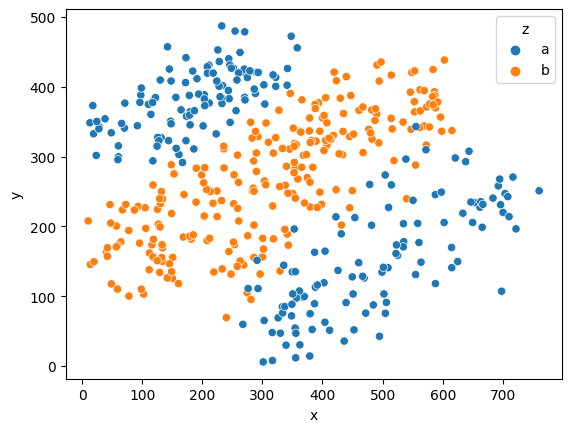

In [59]:
sns.scatterplot(data=df, x="x", y="y", hue="z")

In [60]:
X = df[["x", "z"]]
y = df["y"]

In [61]:
encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X[["z"]])

X = X.drop(columns=["z"])
X = pd.concat([X, pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['z']))], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 14050.228615539474


c:\Users\Userpc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


A good regression model should have residuals randomly scattered around zero.

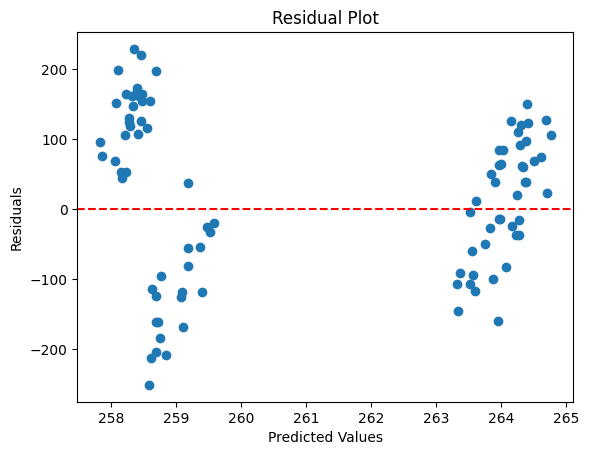

In [62]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.show()

In [63]:
df.dtypes

x    float64
y    float64
z     object
dtype: object